<a href="https://colab.research.google.com/github/donosonahuel/alura-telecom-pt2/blob/main/Alura_Challenge_Telecom_X_Pt2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Subir archivo de datos e importar bibliotecas

In [38]:
import pandas as pd

In [39]:
telecom_datos = pd.read_csv('/content/telecom_df_final.csv')

In [40]:
telecom_datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   bool   
 2   Contract          7267 non-null   object 
 3   PaperlessBilling  7267 non-null   bool   
 4   PaymentMethod     7267 non-null   object 
 5   Charges.Monthly   7267 non-null   float64
 6   Charges.Total     7267 non-null   float64
 7   Cuentas_Diarias   7267 non-null   float64
dtypes: bool(2), float64(3), object(3)
memory usage: 355.0+ KB


# Eliminación de Columnas Irrelevantes

In [41]:
telecom_datos = telecom_datos.drop(columns = 'customerID')

In [42]:
telecom_datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             7267 non-null   bool   
 1   Contract          7267 non-null   object 
 2   PaperlessBilling  7267 non-null   bool   
 3   PaymentMethod     7267 non-null   object 
 4   Charges.Monthly   7267 non-null   float64
 5   Charges.Total     7267 non-null   float64
 6   Cuentas_Diarias   7267 non-null   float64
dtypes: bool(2), float64(3), object(2)
memory usage: 298.2+ KB


# Encoding

In [43]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

In [44]:
# Defino la variable objetivo "y" (la que quiero predecir)
# La matriz de caracteristicas "X" (las variables predictoras)

y = telecom_datos['Churn']
X = telecom_datos.drop('Churn', axis = 1)

In [45]:
# Momento de usar LabelEncoder para pasar de texto a numero

le = LabelEncoder()
X['Contract'] = le.fit_transform(X['Contract'])
X['PaperlessBilling'] = le.fit_transform(X['PaperlessBilling'])
X['PaymentMethod'] = le.fit_transform(X['PaymentMethod'])

In [46]:
# Usando MinMaxScaler para que las variables numericas queden entre 0 y 1
# Asegura esto que tenga la misma influencia la información

scaler = MinMaxScaler()
numerical_columns = ['Charges.Monthly', 'Charges.Total', 'Cuentas_Diarias']
X[numerical_columns] = scaler.fit_transform(X[numerical_columns])

In [47]:
# Ahora se divide los datos en conjuntos de entrenamiento(80%) y prueba(20%)
# Para que el modelo aprenda con una parte y luego con datos que no ha visto

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [48]:
# Se corrobara las dimensiones de lo que se hizo anteriormente

print("--------------")
print("Dimension de los conjuntos de datos luego de la división: ")
print()
print(f'Conjunto de entrenamiento(X_train): {X_train.shape}')
print(f'Conjunto de prueba(X_test): {X_test.shape}')
print(f'Variable objetivo de entrenamiento(y_train): {y_train.shape}')
print(f'Variable objetivo de prueba(y_test): {y_test.shape}')
print("--------------")

--------------
Dimension de los conjuntos de datos luego de la división: 

Conjunto de entrenamiento(X_train): (5813, 6)
Conjunto de prueba(X_test): (1454, 6)
Variable objetivo de entrenamiento(y_train): (5813,)
Variable objetivo de prueba(y_test): (1454,)
--------------


# Verificación de la Proporción de Cancelación (Churn)

In [49]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [50]:
# Se empieza a crear una instancia del modelo para que se fije en los clientes
# Los mas parecidos para tomar una decisión

knn = KNeighborsClassifier(n_neighbors = 3)

In [51]:
# Usando .fit() es el paso del "entrenamiento" para que aprenda del conjunto de datos
# A partir de X_train e y_train

knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [52]:
# Hora de hacer las predicciones para su "examen" usando .predict()
# Para corrobar lo que no vio en X_test

predicciones = knn.predict(X_test)

In [53]:
# En el momento de calcular su presición con "accuracy"
# Para saber cual fue el porcentaje de exactitud

precision = accuracy_score(y_test, predicciones)

In [54]:
# Calculando la matriz de confusión dara un resumen
# Detallado de los aciertos y fallos

matriz = confusion_matrix(y_test, predicciones)

In [55]:
# Imprimiendo los resultados

print("--------------")
print(f'Presicion del modelo: {precision:.2f}')
print("--------------")
print('Matriz de confusión: ')
print(matriz)
print("--------------")

--------------
Presicion del modelo: 0.77
--------------
Matriz de confusión: 
[[936 146]
 [195 177]]
--------------


# Balanceo de Clases

In [56]:
from sklearn.linear_model import LogisticRegression

In [57]:
# Creando la instancia del modelo lineal que no tiene hiperparametro 'k'

lr = LogisticRegression(random_state = 42, max_iter = 1000)

In [58]:
# Entrenamos el modelo con los datos de entrenamiento

lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [59]:
# Predicciones de los datos de prueba

predicciones_lr = lr.predict(X_test)

In [62]:
# Calculamos la precision del modelo

precision_lr = accuracy_score(y_test, predicciones_lr)

In [60]:
# Calculamos la matriz de confusión del modelo

matriz_lr = confusion_matrix(y_test, predicciones_lr)

In [63]:
# Imprimiendo los resultados

print("--------------")
print(f'Presicion del modelo de Regresión Logistica: {precision_lr:.2f}')
print("--------------")
print('Matriz de confusión del modelo de Regresión Logistica: ')
print(matriz_lr)
print("--------------")

--------------
Presicion del modelo de Regresión Logistica: 0.80
--------------
Matriz de confusión del modelo de Regresión Logistica: 
[[989  93]
 [200 172]]
--------------


# Normalización o Estandarización

## Regresión Logística

   Es la mejor opción por su leve mejoría del 3% con 80% en total en comparación con **KNeighbors** que fue de un 77% de certeza.

### A destacar:
   . Tuvo mayor ventaja a la hora de reducir los **FALSOS NEGATIVOS** ayudando a la empresa que actuén para que no renuncien el servicio

   . Reduce las falsas alarmas para que el equipo de marketing puedan actuar con los clientes en riesgo de irse

   . Es menor el peligro de errores en las areas mas criticas


# Análisis de Correlación

In [64]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

In [65]:
# Creando una instancia del modelo haciendo uso de
# 'random_state' para que los resultados sean reproducibles

arbol_decision = DecisionTreeClassifier(random_state = 42)

In [66]:
# Hora de entrenar el arbol con los datos de entrenamiento

arbol_decision.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [67]:
# Crear una variable para que nos de la importancia de cada columna
# Usando 'feature_importances_' obteniendo un array

importancia_columnas = arbol_decision.feature_importances_

In [68]:
# Creo una función para una mejor visualización

df_importancia = pd.DataFrame({
    'Caracteristica': X.columns,
    'Importancia': importancia_columnas
})

In [69]:
# Ordeno el dataframe de forma descendente

df_importancia = df_importancia.sort_values(by = 'Importancia', ascending = False)

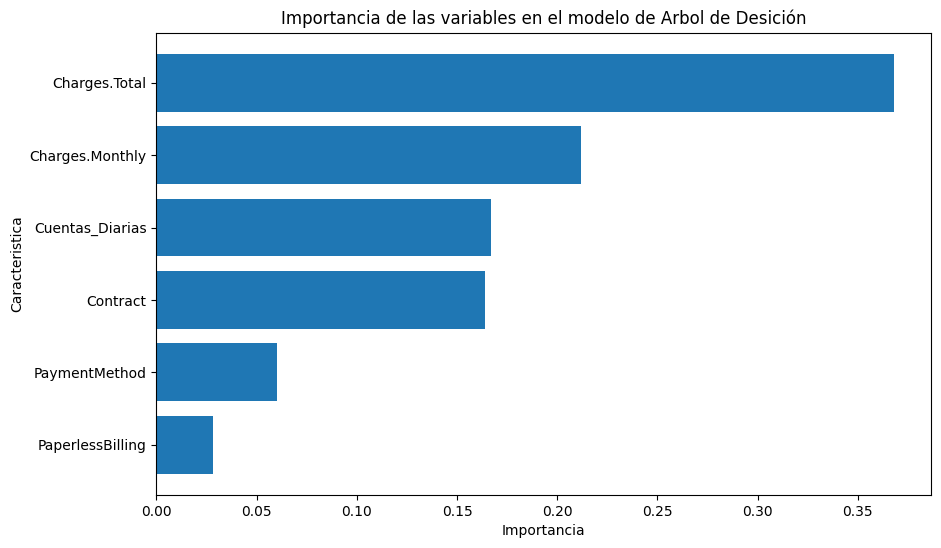

In [72]:
# Hora de visualizar los datos
# Creando un grafico de barras para ver la importancia de cada columna

plt.figure(figsize = (10, 6))
plt.title('Importancia de las variables en el modelo de Arbol de Desición')
plt.barh(df_importancia['Caracteristica'], df_importancia['Importancia'])
plt.xlabel('Importancia')
plt.ylabel('Caracteristica')
plt.gca().invert_yaxis()
plt.show()

In [79]:
# Imprimiendo los resultados

print("--------------")
print('Importancia de las variables en el modelo de Arbol de Desición: ')
print()
print(df_importancia)
print("--------------")

--------------
Importancia de las variables en el modelo de Arbol de Desición: 

     Caracteristica  Importancia
4     Charges.Total     0.368282
3   Charges.Monthly     0.211965
5   Cuentas_Diarias     0.167165
0          Contract     0.163832
2     PaymentMethod     0.060336
1  PaperlessBilling     0.028419
--------------


# Análisis Dirigido